## 6.2 PyTorch nn 模块

In [17]:
%matplotlib inline
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [18]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)  # <1>
t_u = torch.tensor(t_u).unsqueeze(1)  # <1>

t_c, t_u, t_c.shape, t_u.shape

(tensor([[ 0.5000],
         [14.0000],
         [15.0000],
         [28.0000],
         [11.0000],
         [ 8.0000],
         [ 3.0000],
         [-4.0000],
         [ 6.0000],
         [13.0000],
         [21.0000]]),
 tensor([[35.7000],
         [55.9000],
         [58.2000],
         [81.9000],
         [56.3000],
         [48.9000],
         [33.9000],
         [21.8000],
         [48.4000],
         [60.4000],
         [68.4000]]),
 torch.Size([11, 1]),
 torch.Size([11, 1]))

In [19]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 0,  5, 10,  4,  9,  3,  1,  2,  6]), tensor([8, 7]))

In [20]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

t_c_train, t_un_val

(tensor([[ 0.5000],
         [ 8.0000],
         [21.0000],
         [11.0000],
         [13.0000],
         [28.0000],
         [14.0000],
         [15.0000],
         [ 3.0000]]),
 tensor([[4.8400],
         [2.1800]]))

In [21]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[0.2633],
        [0.5617]], grad_fn=<AddmmBackward0>)

In [22]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[-0.1122]], requires_grad=True),
 Parameter containing:
 tensor([0.8063], requires_grad=True))

In [23]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [24]:
linear_model.parameters(), list(linear_model.parameters())

(<generator object Module.parameters at 0x000001BF0C12F8B0>,
 [Parameter containing:
  tensor([[0.0503]], requires_grad=True),
  Parameter containing:
  tensor([-0.3787], requires_grad=True)])

In [25]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)  # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)  # <1>
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()  # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [26]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()


linear_model = nn.Linear(1, 1)  # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 266.4689, Validation loss 32.0243
Epoch 1000, Training loss 4.3963, Validation loss 7.8509
Epoch 2000, Training loss 2.5938, Validation loss 4.9487
Epoch 3000, Training loss 2.4250, Validation loss 5.4121

Parameter containing:
tensor([[5.4720]], requires_grad=True)
Parameter containing:
tensor([-17.7327], requires_grad=True)


In [27]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 268.9079, Validation loss 32.4398
Epoch 1000, Training loss 4.4133, Validation loss 7.8897
Epoch 2000, Training loss 2.5954, Validation loss 4.9478
Epoch 3000, Training loss 2.4252, Validation loss 5.4106

Parameter containing:
tensor([[5.4716]], requires_grad=True)
Parameter containing:
tensor([-17.7304], requires_grad=True)


In [28]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [29]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [30]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [31]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [32]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [33]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2923], requires_grad=True)

In [34]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 238.4480, Validation loss 27.2316
Epoch 1000, Training loss 5.3380, Validation loss 6.4331
Epoch 2000, Training loss 4.1291, Validation loss 5.8248
Epoch 3000, Training loss 2.2423, Validation loss 3.7789
Epoch 4000, Training loss 1.9072, Validation loss 3.0334
Epoch 5000, Training loss 1.8802, Validation loss 3.0586
output tensor([[ 7.8065],
        [-2.3107]], grad_fn=<AddmmBackward0>)
answer tensor([[ 6.],
        [-4.]])
hidden tensor([[ 0.0008],
        [-0.0136],
        [-0.0024],
        [-0.0048],
        [-0.0113],
        [-0.0053],
        [-0.0004],
        [-0.0049]])


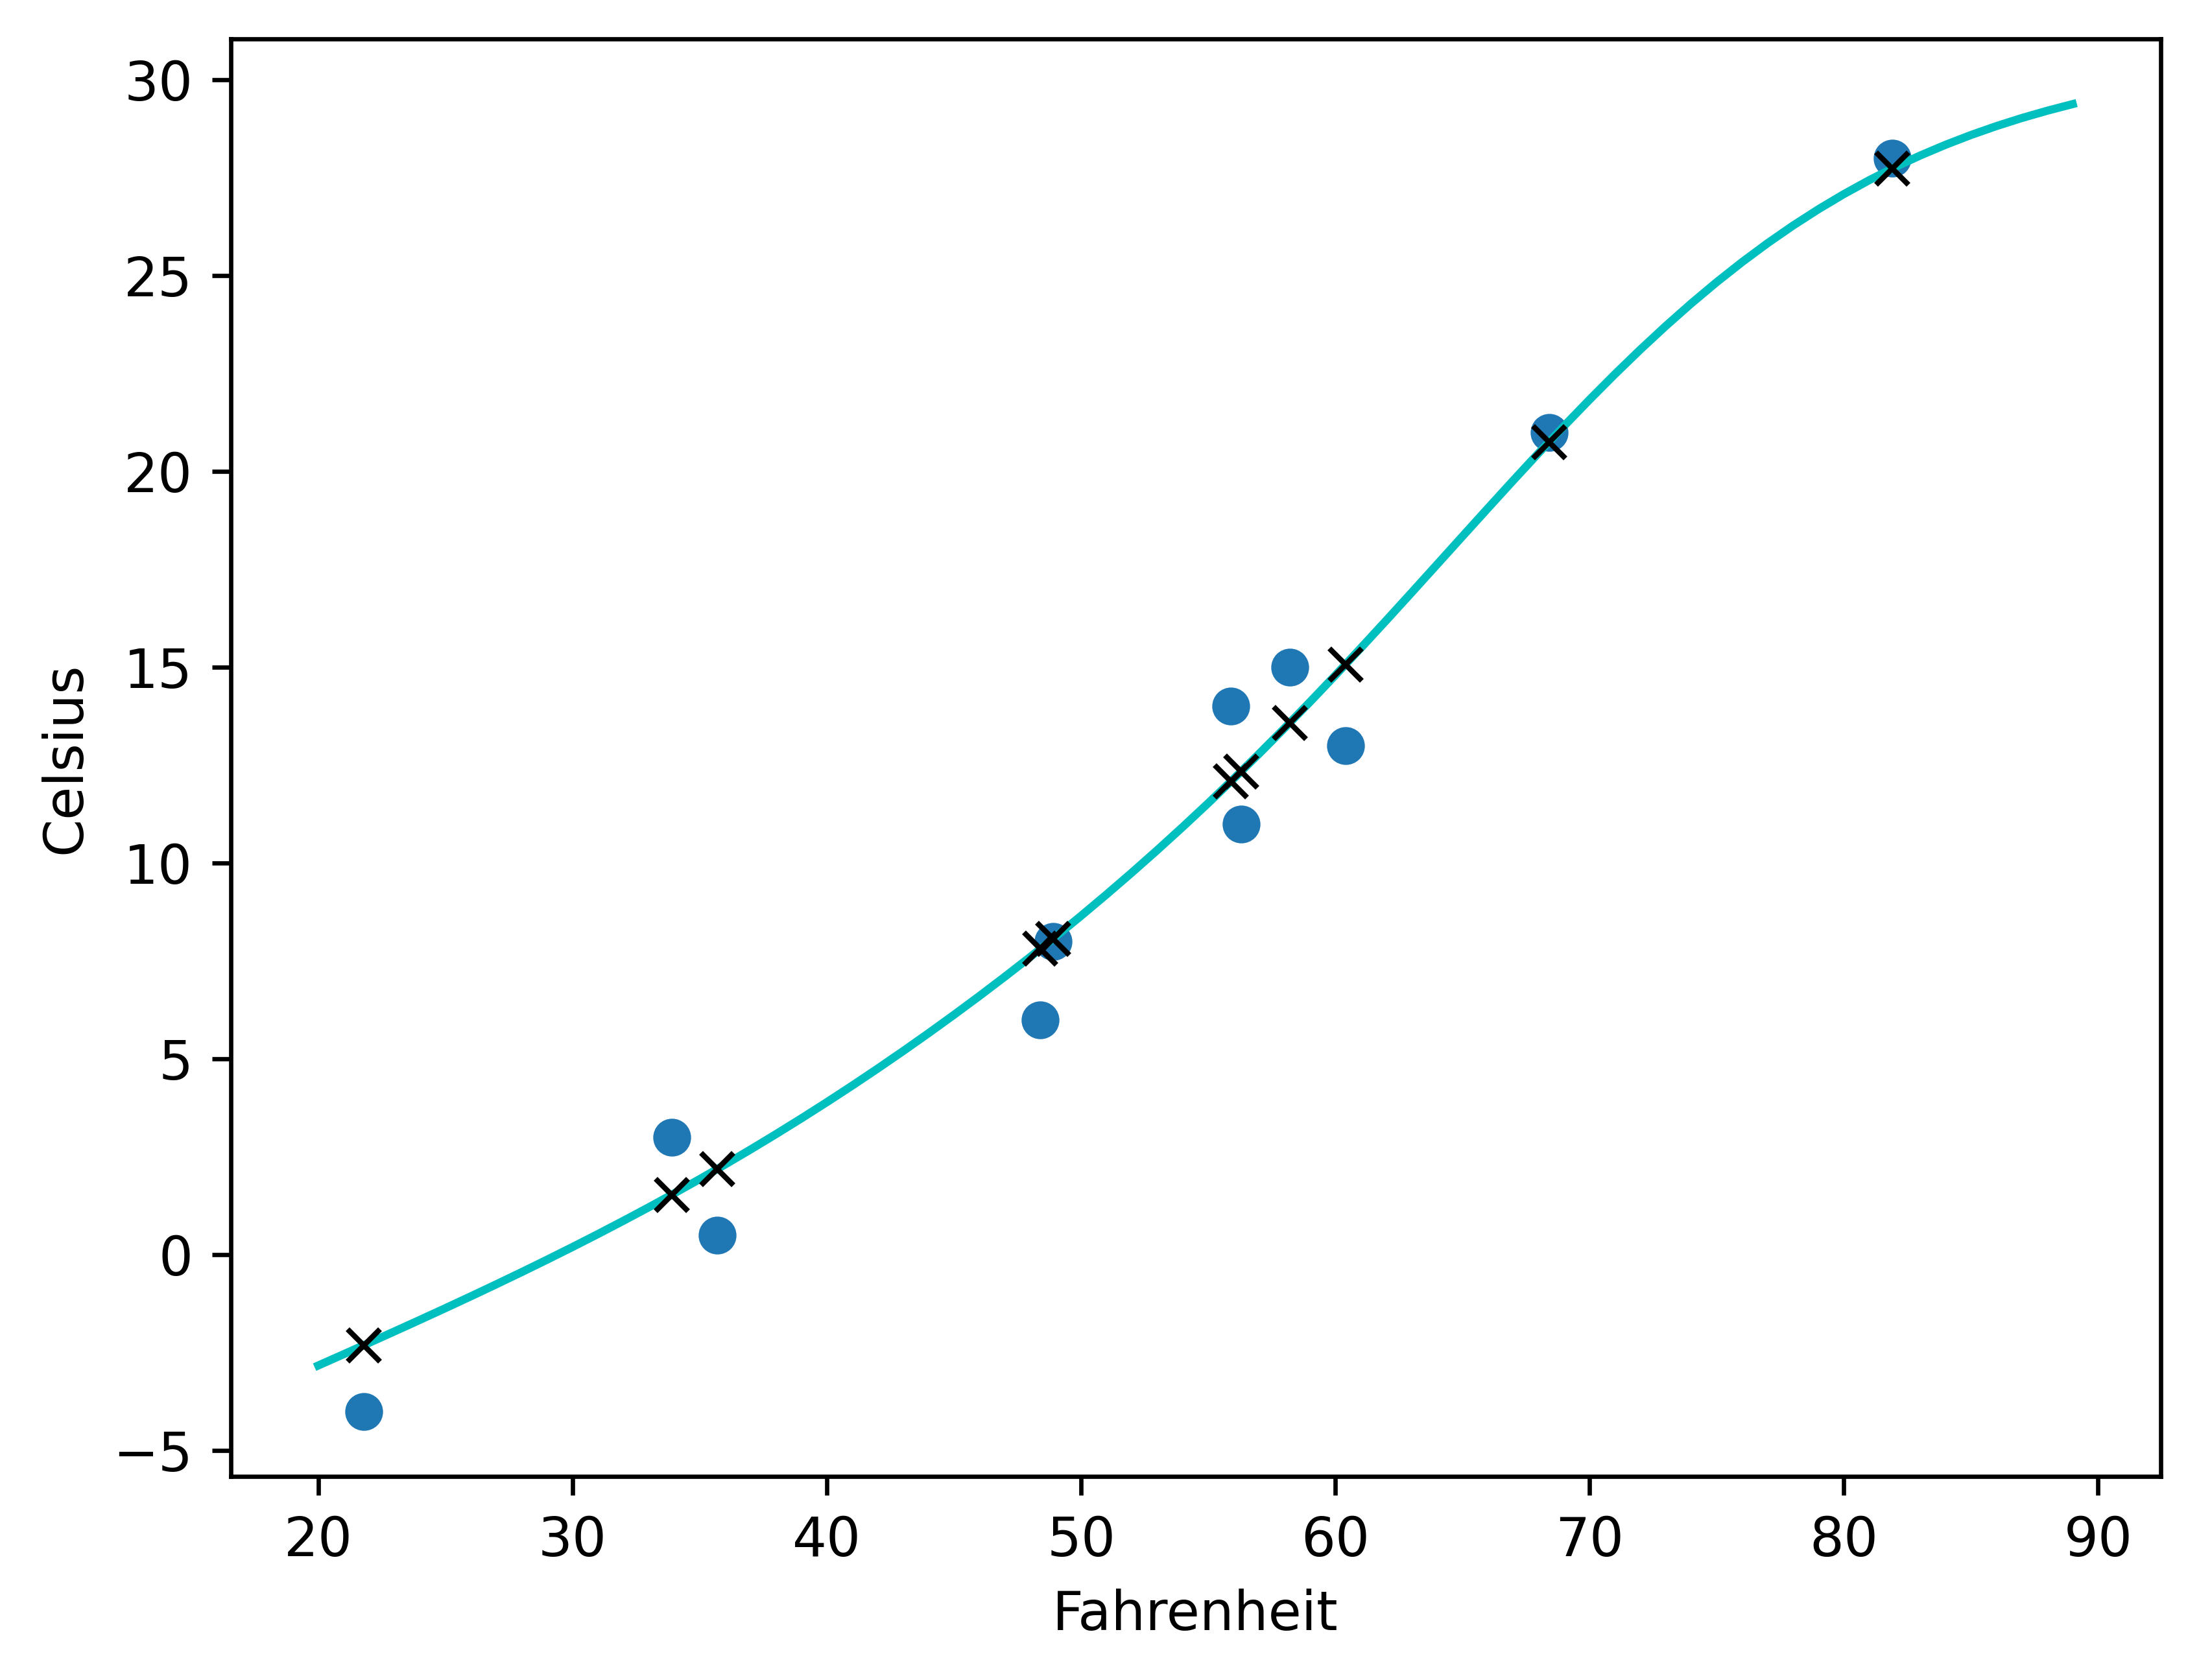

In [35]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')